# Web Scrapping Kompas News

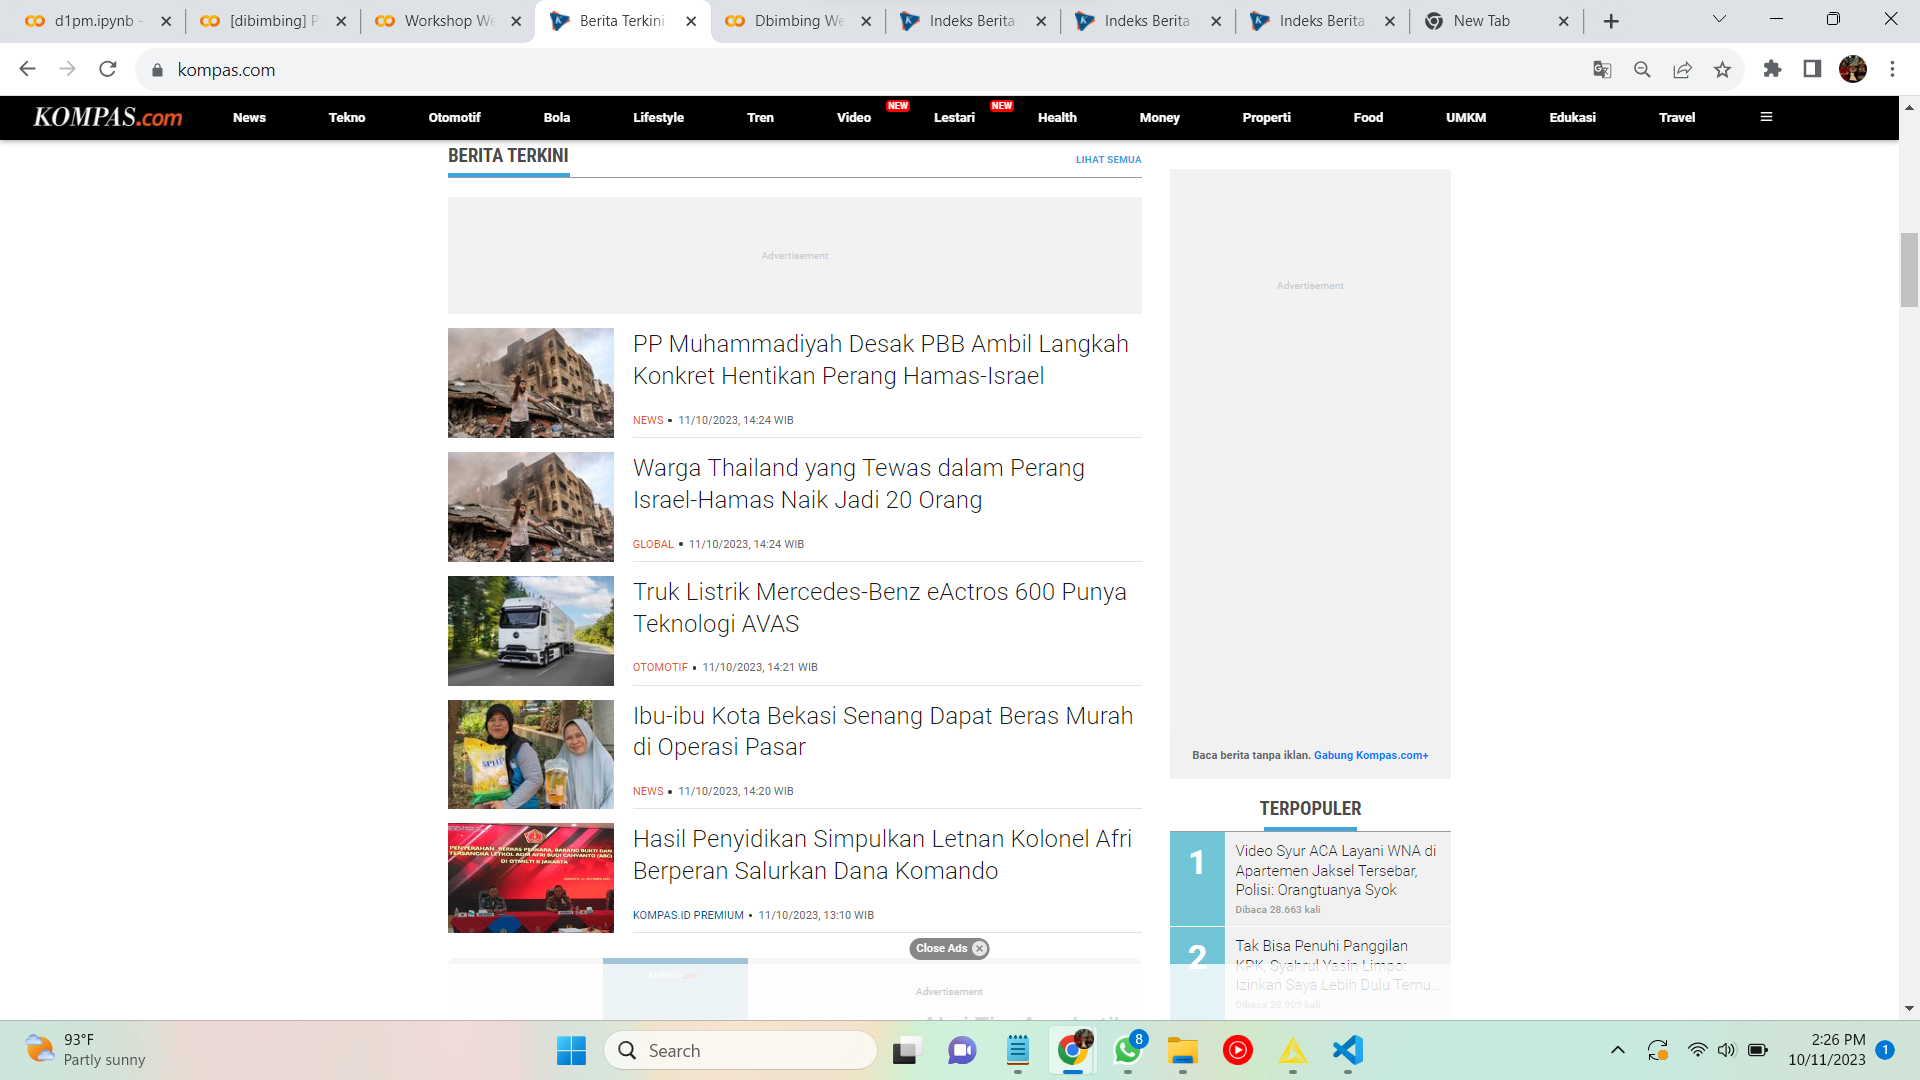

In [22]:
# Import Libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define URL
url = 'https://www.kompas.com/'
response = requests.get(url)
html = response.text

# Make an object
soup = BeautifulSoup(html, 'html.parser')
print(soup.prettify()[:700])


<!DOCTYPE html>
<html lang="id">
 <head>
  <script>
   window.dataLayer = window.dataLayer || [];
        window.dataLayer.push({
            "title": "Berita Terkini Hari Ini, Kabar Akurat Terpercaya - Kompas.com",
            "description": "Kompas.com - Berita Indonesia dan Dunia Terkini Hari Ini, Kabar Harian Terbaru Terpercaya Terlengkap Seputar Politik, Ekonomi, Travel, Teknologi, Otomotif, Bola",
            "keywords": "Berita Terkini, Berita Hari Ini, Berita Harian, Berita Terbaru, Berita Akurat, Berita Terpercaya, Berita indonesia, Berita Terpopuler, Berita, Info Terkini, Jernih Melihat Dunia, Kompas",
            "content_category": "home",
            "canonical": "https://www.ko


In [23]:
response.text

'<!DOCTYPE html>\n<html lang="id">\n<head>\n    <script>\n        window.dataLayer = window.dataLayer || [];\n        window.dataLayer.push({\n            "title": "Berita Terkini Hari Ini, Kabar Akurat Terpercaya - Kompas.com",\n            "description": "Kompas.com - Berita Indonesia dan Dunia Terkini Hari Ini, Kabar Harian Terbaru Terpercaya Terlengkap Seputar Politik, Ekonomi, Travel, Teknologi, Otomotif, Bola",\n            "keywords": "Berita Terkini, Berita Hari Ini, Berita Harian, Berita Terbaru, Berita Akurat, Berita Terpercaya, Berita indonesia, Berita Terpopuler, Berita, Info Terkini, Jernih Melihat Dunia, Kompas",\n            "content_category": "home",\n            "canonical": "https://www.kompas.com",\n            "subscription": "False"\n        });\n    </script>\n    \n   \n<!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\nnew Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\nj=d.createElement(s

In [24]:
type(response.text)

str

In [25]:
# Try to find News Title with BeautifulSoup
soup.find('a',{"class":"article__link"}).text

'Pendaftaran CPNS dan PPPK 2023 Ditutup Hari Ini Pukul 23.59 WIB'

In [26]:
# Web Scrapping for 1 page
df = pd.DataFrame()

judul = []
kategori = []
link = []
image_link = []


for news in soup.find_all("div",{"class":"latest ga--latest mt2 clearfix"}):
    judul.append(news.find('a',{"class":"article__link"}).text)
    link.append(news.find('a',{"target":"_parent"})['href'])
    image_link.append(news.find('img',{"class":"lozad"})['data-src'])


df['judul'] = judul
df['link'] = link
df['image_link'] = image_link

df

,judul,link,image_link
0,Truk Listrik Mercedes-Benz eActros 600 Punya T...,https://otomotif.kompas.com/read/2023/10/11/14...,https://asset.kompas.com/crops/OI-m789S8LNZ9J8...
1,"Jarang Disadari, “Bocor Alus” Biaya Logistik B...",https://money.kompas.com/read/2023/10/11/14150...,https://asset.kompas.com/crops/yaeyYiS70_nOUqO...
2,Pria di Toba Tewas Tersetrum saat Cek Perbaika...,https://medan.kompas.com/read/2023/10/11/14093...,https://asset.kompas.com/crops/C_CHMzhDBmaiiEq...
3,Makanan Khas Banten Hadir di Restoran Hotel di...,https://www.kompas.com/food/read/2023/10/11/14...,https://asset.kompas.com/crops/pWm3BIgfwdFfQSn...


## Webscrapping for scrolling page

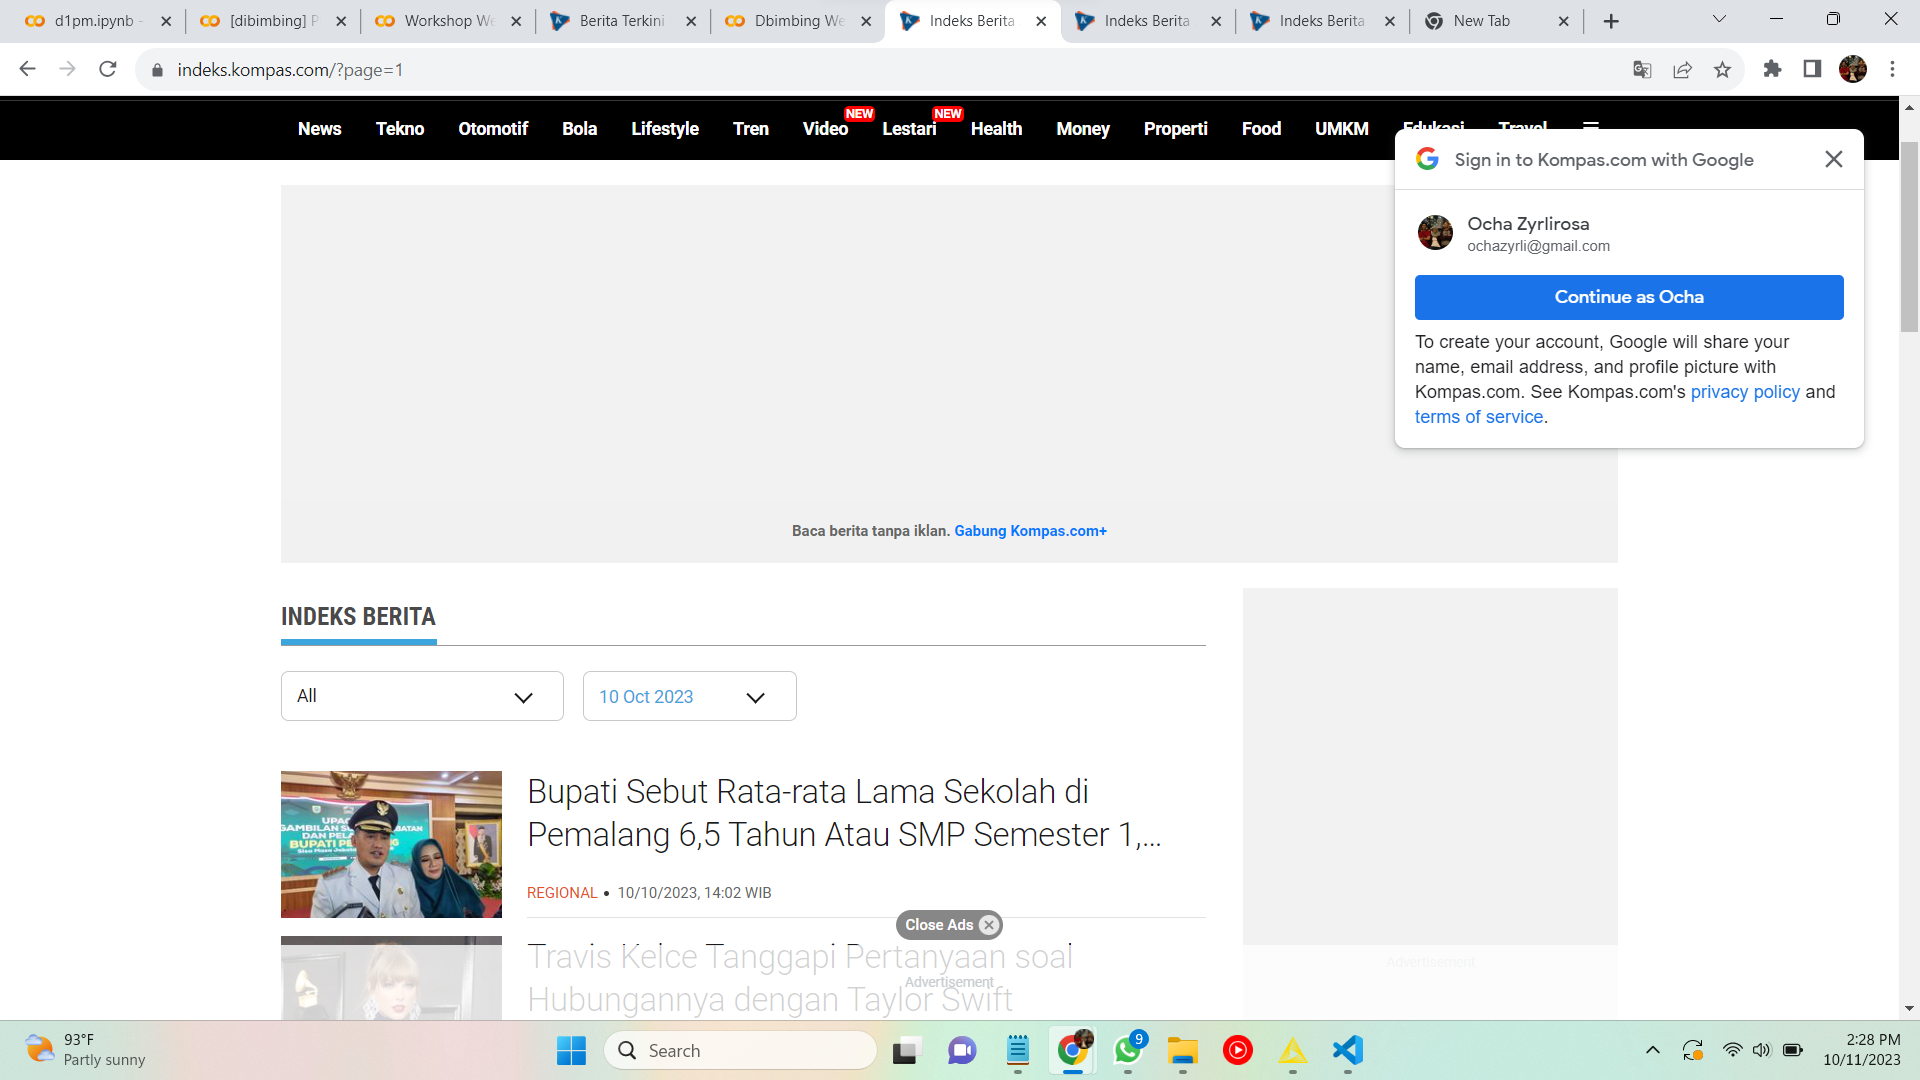

In [29]:
# Define List for DataFrame
judul = []
link = []

for i in range(0,5): #Scrolling from page 1 to 4
    url="https://indeks.kompas.com/?page={}".format(i) # Link for Infinite Scroll
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")

    for news in soup.find_all( 'div',{"class":"article__list clearfix"} ):
        try:
            judul.append(news.find('a',{"class":"article__link"}).text)
            link.append(news.find('a',{"class":"article__link"})['href'])
        except:
            pass

scroll_df = pd.DataFrame()
scroll_df['judul'] = judul
scroll_df['link'] = link

scroll_df

,judul,link
0,"Jawaban dari Soal ""Nomor Telepon di Kota Malan...",https://www.kompas.com/skola/read/2023/10/11/1...
1,"Tak Ada Tempat Aman, Warga Sipil di Gaza: Ke M...",https://www.kompas.com/tren/read/2023/10/11/14...
2,Kepala Badan Wasit Inggris Buka Suara soal Blu...,https://bola.kompas.com/read/2023/10/11/143000...
3,[KLARIFIKASI] Video Pengunjung Pantai Israel M...,https://www.kompas.com/cekfakta/read/2023/10/1...
4,"Setelah Dipecat PSI, Viani Limardi Kini Gabung...",https://megapolitan.kompas.com/read/2023/10/11...
...,...,...
70,7 Beasiswa ke Luar Negeri dengan Syarat IPK Ku...,https://www.kompas.com/edu/read/2023/10/11/133...
71,"Fakta Menarik Drama Terbaru Ji Chang Wook, “Th...",https://www.kompas.com/tren/read/2023/10/11/13...
72,Lirik dan Chord Lagu Poison Poison - Renee Rapp,https://www.kompas.com/hype/read/2023/10/11/13...
73,Hakim Singgung Misteri Pengembalian Rp 27 Mili...,https://nasional.kompas.com/read/2023/10/11/13...


In [30]:
df.to_csv('Result Web Scrapping.csv')
scroll_df.to_csv('Result Web Scrapping Infinite Scroll.csv')